In [1]:
import pandas as pd
import json

with open("../ChatExport_exemple/SDVG.json", encoding="utf-8") as f:
    data = json.load(f)
    messages = data["messages"]


df = pd.DataFrame(messages)[
   [ "id", "type", "date", "date_unixtime", "from", "from_id", "text"] #базовый вариант без фотографий и всяких излишеств
]

In [2]:
df

,id,type,date,date_unixtime,from,from_id,text
0,410625,message,2025-04-07T07:08:44,1743998924,Сашкаа Серенок,user998666980,да фу блин
1,410626,message,2025-04-07T07:08:50,1743998930,Сашкаа Серенок,user998666980,даша а в работе быои числительные
2,410627,message,2025-04-07T07:12:31,1743999151,Darya Shevchenko,user5295729053,Нет
3,410628,message,2025-04-07T07:55:59,1744001759,Сашкаа Серенок,user998666980,у меня вроде 3 ошибки
4,410629,message,2025-04-07T07:56:04,1744001764,Сашкаа Серенок,user998666980,фронты
...,...,...,...,...,...,...,...
6052,418801,message,2025-04-17T21:42:07,1744915327,Darya Shevchenko,user5295729053,"[{'type': 'bold', 'text': '⚡️Олимпиадников, ко..."
6053,418802,message,2025-04-17T21:46:42,1744915602,Сашкаа Серенок,user998666980,АХАХХАХА
6054,418803,message,2025-04-17T21:46:42,1744915602,Сашкаа Серенок,user998666980,ДА НЕ БОТАЮ Я
6055,418804,message,2025-04-17T21:46:42,1744915602,Сашкаа Серенок,user998666980,потому что хочу на сво


In [3]:
filtered_df  = df[df["text"].apply(lambda x: isinstance(x, str) and len(x) > 0)]

In [4]:
filtered_df

,id,type,date,date_unixtime,from,from_id,text
0,410625,message,2025-04-07T07:08:44,1743998924,Сашкаа Серенок,user998666980,да фу блин
1,410626,message,2025-04-07T07:08:50,1743998930,Сашкаа Серенок,user998666980,даша а в работе быои числительные
2,410627,message,2025-04-07T07:12:31,1743999151,Darya Shevchenko,user5295729053,Нет
3,410628,message,2025-04-07T07:55:59,1744001759,Сашкаа Серенок,user998666980,у меня вроде 3 ошибки
4,410629,message,2025-04-07T07:56:04,1744001764,Сашкаа Серенок,user998666980,фронты
...,...,...,...,...,...,...,...
6051,418800,message,2025-04-17T21:42:07,1744915327,Darya Shevchenko,user5295729053,так вот почему николай начал ботать
6053,418802,message,2025-04-17T21:46:42,1744915602,Сашкаа Серенок,user998666980,АХАХХАХА
6054,418803,message,2025-04-17T21:46:42,1744915602,Сашкаа Серенок,user998666980,ДА НЕ БОТАЮ Я
6055,418804,message,2025-04-17T21:46:42,1744915602,Сашкаа Серенок,user998666980,потому что хочу на сво


# Облако слов


In [83]:
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import nltk




In [ ]:
nltk.download("stopwords")
sw = stopwords.words("russian")
russian_stopwords = [
        "в",
        "ой",
        "типо",
        "че",
        "всё",
        "хз",
        "это",
        "типа",
        "прям",
        "ваще",
        "щас",
        "кста",
        'кст',
        "ага",
        "блин",
        "на",
        "по",
        "за",
        "из",
        "к",
        "до",
        "о",
        "об",
        "обо",
        "от",
        "для",
        "без",
        "при",
        "так",
        "с",
        "у",
        'еще',
        "ещё",
        "тоже",
        "там",
        "тогда",
        "кстати",
        "над",
        "под",
        "про",
        "через",
        "из",
        "со",
        "во",
        "перед",
        "между",
        "сквозь",
        "вне",
        "ввиду",
        "вследствие",
        "благодаря",
        "вопреки",
        "согласно",
        "напротив",
        "помимо",
        "посредством",
        "бы",
        "же",
        "ли",
        "не",
        "ну",
        "вот",
        "даже",
        "именно",
        "просто",
        "прямо",
        "уже",
        "еще",
        "только",
        "хотя",
        "ведь",
        "таки",
        "же",
        "лишь",
        "пусть",
        "пускай",
        "ладно",
        "вон",
        "мол",
        "де",
        "ка",
        "небось",
        "то",
        "эдак",
        "будто",
        "словно",
        "якобы",
        "все-таки",
        "всего",
        "и",
        "а",
        "но",
        "да",
        "или",
        "что",
        "как",
        "чтобы",
        "если",
        "когда",
        "потому",
        "потому что",
        "так как",
        "поскольку",
        "либо",
        "хотя",
        "зато",
        "то",
        "нежели",
        "ибо",
        "будто",
        "словно",
        "точно",
        "иначе",
        "пока",
        "раз",
        "поэтому",
        "следовательно",
        "таким образом",
        "между тем",
        "в то время как",
        "после того как",
        "до того как",
        "прежде чем",
        "как будто",
        "так что",
    ]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [96]:
text = " ".join(
    [el for el in " ".join(filtered_df["text"]).lower().split() if len(el) > 1]
)
# Создание шаблона для поиска эмодзи
emoji_pattern = re.compile(
    "["
    "\U0001f600-\U0001f64f"  # эмоции
    "\U0001f300-\U0001f5ff"  # символы и пиктограммы
    "\U0001f680-\U0001f6ff"  # транспорт и карты
    "\U0001f1e0-\U0001f1ff"  # флаги
    "\U00002702-\U000027b0"
    "\U000024c2-\U0001f251"
    "]+",
    flags=re.UNICODE,
)

# Удаление эмодзи из текста
text = emoji_pattern.sub(r"", text)
stopwords_all = set(STOPWORDS) | set(rusian_stopwords) | set(sw)


In [97]:
wc = WordCloud(background_color="white", stopwords=stopwords_all, height=800, width=1200)
wc.generate(text)
wc.to_file('./worldclouds/word_cloud_jane_2.png')

# Скитания в сторону анализа текста и руберт

In [5]:
from nltk.tokenize import word_tokenize
import pymorphy3
from transformers import pipeline

model = pipeline(model="seara/rubert-tiny2-russian-sentiment")
morph = pymorphy3.MorphAnalyzer()

In [6]:
def model_analysis(text):
    return model(text)[0]["label"]

def tokenize(text):
    tokenized_text = word_tokenize(text, language="russian")

    return tokenized_text


def lemmatize(text):
    lemmatized_text = [morph.parse(word)[0].normal_form for word in text]

    return lemmatized_text

def filter_words(words):

    filtered_words = []
    for word in words:
        parsed_word = morph.parse(word)[0]
        if parsed_word.tag.POS in {'NOUN', 'ADJF', 'ADJS', 'INFN', 'VERB'}:  # если это существительное, прилагательное или глагол
            filtered_words.append(word)
    processed_text = " ".join(filtered_words)

    return processed_text

In [7]:
n_all = len(filtered_df["text"])
authors = filtered_df["from"].unique()

sent_analysis = filtered_df["text"].apply(model_analysis)
# lemmatized_df = filtered_df["text"].apply(lemmatize)
# filter_words_df = filtered_df["text"].apply(filter_words)


In [8]:
filtered_df["sentimental"] = sent_analysis
# filtered_df['lemmatized_text'] = lemmatized_df
# filtered_df['filtered_text'] = filter_words_df

C:\Users\Daria\AppData\Local\Temp\ipykernel_20632\941144118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["sentimental"] = sent_analysis


In [9]:
filtered_df.to_csv("../data/filtered_df3.csv", index=False)

C:\Users\Daria\AppData\Local\Temp\ipykernel_17228\680902029.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
c:\Users\Daria\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1069 (\N{CYRILLIC CAPITAL LETTER E}) missing from font(s) Segoe UI Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Daria\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1084 (\N{CYRILLIC SMALL LETTER EM}) missing from font(s) Segoe UI Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Daria\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 1086 (\N{CYRILLIC SMALL LETTER O}) missing from font(s) Segoe UI Emoji.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Daria\App

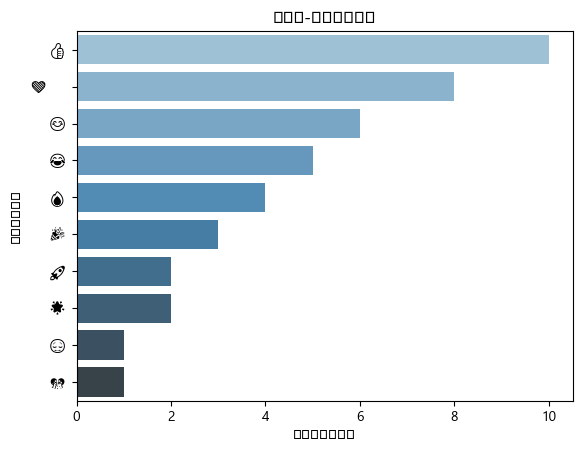

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Установите шрифт, который поддерживает эмодзи
plt.rcParams['font.family'] = 'Segoe UI Emoji'

# Пример данных
top_emoji_series = pd.Series({'👍': 10, '❤️': 8, '😊': 6, '😂': 5, '🔥': 4, '🎉': 3, '🚀': 2, '🌟': 2, '😌': 1, '🎊': 1})

# Создание графика
fig, ax = plt.subplots()
sns.barplot(
    y=top_emoji_series.index[:10],
    x=top_emoji_series.values[:10],
    palette="Blues_d",
    ax=ax
)
ax.set_title("Топ-эмодзи")
ax.set_xlabel("Частота")
ax.set_ylabel("Эмодзи")

plt.show()
